In [70]:
import lwa_f
from lwa_antpos import mapping
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [71]:
snap_list = []
adc_list = []
antname_list = []
bp_list = []
coeffs_list = []
for snap in range(1, 12):
    s = lwa_f.snap2_fengine.Snap2FengineEtcd('snap%.2d' % snap)
    for adc in range(64):
        coeffs, bp = s.eq.get_coeffs(adc, return_as_int=True)
        ant = mapping.snap2_to_antpol(snap, adc)

        snap_list.append(snap)
        adc_list.append(adc)
        antname_list.append(ant)
        bp_list.append(bp)
        coeffs_list.append(np.array(coeffs))

2025-06-19 09:08:19,451 - lwa_f.blocks.block:snap01 - INFO - eth - Couldn't find Ethernet core. Will retry later


2025-06-19 09:08:23,758 - lwa_f.blocks.block:snap02 - INFO - eth - Couldn't find Ethernet core. Will retry later
2025-06-19 09:08:29,463 - lwa_f.blocks.block:snap03 - INFO - eth - Couldn't find Ethernet core. Will retry later
2025-06-19 09:08:34,275 - lwa_f.blocks.block:snap04 - INFO - eth - Couldn't find Ethernet core. Will retry later
2025-06-19 09:08:40,203 - lwa_f.blocks.block:snap05 - INFO - eth - Couldn't find Ethernet core. Will retry later
2025-06-19 09:08:44,263 - lwa_f.blocks.block:snap06 - INFO - eth - Couldn't find Ethernet core. Will retry later
2025-06-19 09:08:48,309 - lwa_f.blocks.block:snap07 - INFO - eth - Couldn't find Ethernet core. Will retry later
2025-06-19 09:08:54,530 - lwa_f.blocks.block:snap08 - INFO - eth - Couldn't find Ethernet core. Will retry later
2025-06-19 09:08:59,634 - lwa_f.blocks.block:snap09 - INFO - eth - Couldn't find Ethernet core. Will retry later
2025-06-19 09:09:03,610 - lwa_f.blocks.block:snap10 - INFO - eth - Couldn't find Ethernet core. 

In [72]:
coeffs_set_inds = []
coeffs_set = []
unique_coeffs_ind = -1
for ind in range(704):
    new_coeffs = coeffs_list[ind]
    unique_coeffs = True
    for old_coeffs in coeffs_set:
        if np.sum(np.abs(old_coeffs-new_coeffs)) == 0:
            unique_coeffs = False
            continue
    if unique_coeffs:
        unique_coeffs_ind += 1
        coeffs_set.append(new_coeffs)
    coeffs_set_inds.append(unique_coeffs_ind)

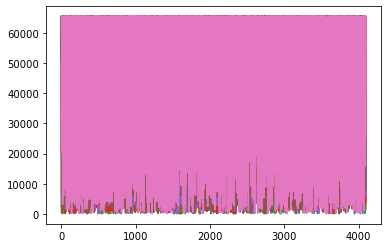

In [73]:
for ind in range(len(coeffs_set)):
    plt.plot(np.arange(len(coeffs_set[ind])), coeffs_set[ind])
plt.show()

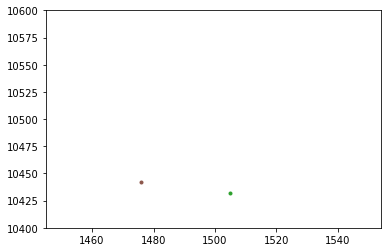

In [74]:
for ind in range(len(coeffs_set)):
    plt.plot(np.arange(len(coeffs_set[ind]))[1450:1550], coeffs_set[ind][1450:1550], ".")
    plt.ylim(10400,10600)
plt.show()

In [75]:
dictionary = {
    "coeffs_set": coeffs_set,
    "coeffs_set_inds": coeffs_set_inds,
    "antnames": antname_list,
    "bps": bp_list,
    "snaps": snap_list,
    "adcs": adc_list
}

In [76]:
#with open('/lustre/rbyrne/equalization_coeffs_20250616.pkl', 'wb') as f:
#    pickle.dump(dictionary, f)